### 같은 객체에 분할하여 그래프 그리기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc 
font_path = 'C:\\Users\\jswoo\\Desktop\\Repository\\Study_Data_Science\\Pandas_Data_Analytics\\Part04\\malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family = font_name)

path = 'C:\\Users\\jswoo\\Desktop\\Repository\\Study_Data_Science\\Pandas_Data_Analytics\\Part04\\시도별 전출입 인구수.xlsx'
df = pd.read_excel(path, header =0, engine='openpyxl')

df = df.fillna(method='ffill')

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace =True)
df_seoul.set_index('전입지', inplace=True)

sr_one = df_seoul.loc['경기도']

plt.style.use('ggplot')

c:\Users\jswoo\Desktop\Repository\Study_Data_Science\venv\lib\site-packages\ipykernel_launcher.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\Users\jswoo\Desktop\Repository\Study_Data_Science\venv\lib\site-packages\ipykernel_launcher.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\Users\jswoo\Desktop\Repository\Study_Data_Science\venv\lib\site-packages\ipykernel_launcher.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\Users\jswoo\Desktop\Repository\Study_Data_Science\venv\lib\site-packages\ipykernel_launcher.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator


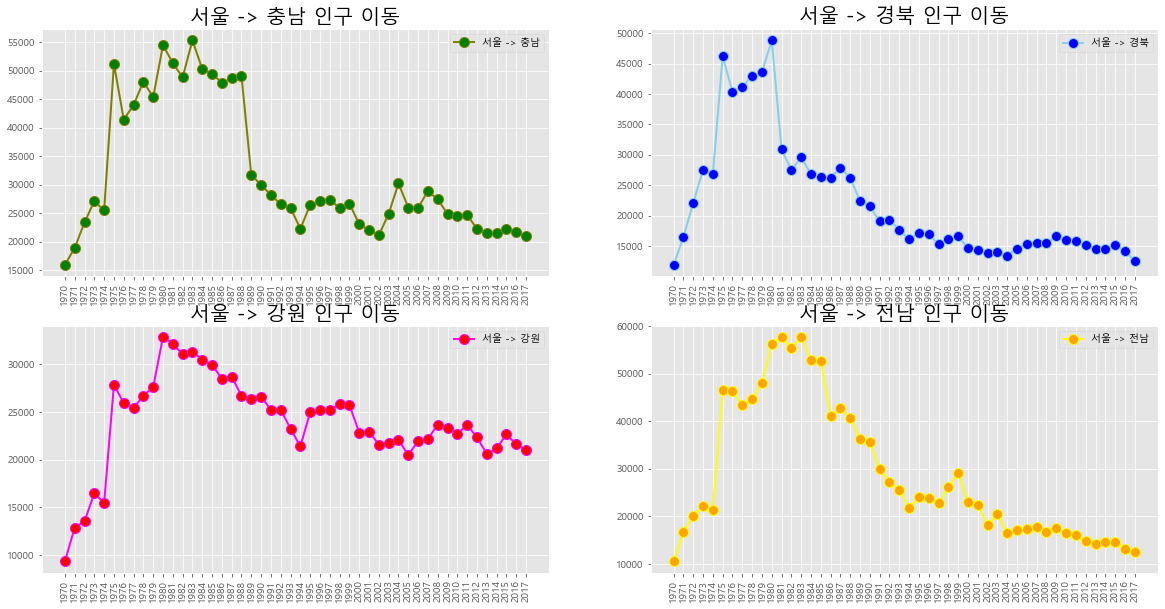

In [4]:
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]

fig = plt.figure(figsize = (20, 10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


ax1.plot(col_years, df_4.loc['충청남도', :], marker = 'o', markerfacecolor = 'green',
        markersize = 10, color = 'olive', linewidth= 2, label = '서울 -> 충남')
ax2.plot(col_years, df_4.loc['경상북도', :], marker = 'o', markerfacecolor = 'blue',
        markersize = 10, color = 'skyblue', linewidth= 2, label = '서울 -> 경북')
ax3.plot(col_years, df_4.loc['강원도', :], marker = 'o', markerfacecolor = 'red',
        markersize = 10, color = 'magenta', linewidth= 2, label = '서울 -> 강원')
ax4.plot(col_years, df_4.loc['전라남도', :], marker = 'o', markerfacecolor = 'orange',
        markersize = 10, color = 'yellow', linewidth= 2, label = '서울 -> 전남')

ax1.legend(loc = 'best')
ax2.legend(loc = 'best')
ax3.legend(loc = 'best')
ax4.legend(loc = 'best')

ax1.set_title('서울 -> 충남 인구 이동', size = 20)
ax2.set_title('서울 -> 경북 인구 이동', size = 20)
ax3.set_title('서울 -> 강원 인구 이동', size = 20)
ax4.set_title('서울 -> 전남 인구 이동', size = 20)

ax1.set_xticklabels(col_years, rotation = 90)
ax2.set_xticklabels(col_years, rotation = 90)
ax3.set_xticklabels(col_years, rotation = 90)
ax4.set_xticklabels(col_years, rotation = 90)

plt.show()